Bài 1:
Cho dữ liệu ở đường link, hãy thực hiện các yêu cầu sau:
https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f
1. Đọc dữ liệu và hiển thị ra 20 mẫu đầu tiên
2. Cho biết Kích thước dữ liệu
3. Cho biết Kiểu dữ liệu
4. Cho biết số lượng mỗi lớp có trong dữ liệu
5. Thực hiện các thống kê cơ bản về các trường trong bộ dữ liệu
6. Tính mối tương quan Pearson cho từng cặp thuộc tính và trực quan hóa kết quả
7. Tính mối tương quan Spearman cho từng cặp thuộc tính và trực quan hóa kết quả
8. Tính Độ lệch (skewness) cho mỗi thuộc tính
9. Hãy sửa những dữ liệu có giá trị bằng 0 là dữ liệu thiếu (NaN)
10. Đếm số lượng giá trị NaN trên mỗi thuộc tính
11. Thay thế giá trị còn thiếu bằng giá trị trung bình của mỗi thuộc tính và lưu vào 1 file
12. Sử dụng mô hình hồi quy để dự đoán với file dữ liệu trên

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu và hiển thị ra 20 mẫu đầu tiên
col_names = ['Pregnancies', 'Glucose_2H', 'Blood_Pressure', 'Skinfold_Thickness', 'Insulin_2H', 'BMI', 'Diabetes_Pedigree', 'Age', 'Diabetes_Class']
data = pd.read_csv('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', skiprows=9, names=col_names)
data.head(20)

,Pregnancies,Glucose_2H,Blood_Pressure,Skinfold_Thickness,Insulin_2H,BMI,Diabetes_Pedigree,Age,Diabetes_Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
print('Kích thước dữ liệu: ', data.shape)
print('Kiểu dữ liệu: ', data.dtypes)

Kích thước dữ liệu:  (768, 9)
Kiểu dữ liệu:  Pregnancies             int64
Glucose_2H              int64
Blood_Pressure          int64
Skinfold_Thickness      int64
Insulin_2H              int64
BMI                   float64
Diabetes_Pedigree     float64
Age                     int64
Diabetes_Class          int64
dtype: object


In [50]:
print('Số lượng mỗi lớp có trong dữ liệu: ')
print(data.groupby('Diabetes_Class').size())

print('Thống kê cơ bản về các trường trong bộ dữ liệu: ')
data.describe()

Số lượng mỗi lớp có trong dữ liệu: 
Diabetes_Class
0    500
1    268
dtype: int64
Thống kê cơ bản về các trường trong bộ dữ liệu: 


,Pregnancies,Glucose_2H,Blood_Pressure,Skinfold_Thickness,Insulin_2H,BMI,Diabetes_Pedigree,Age,Diabetes_Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


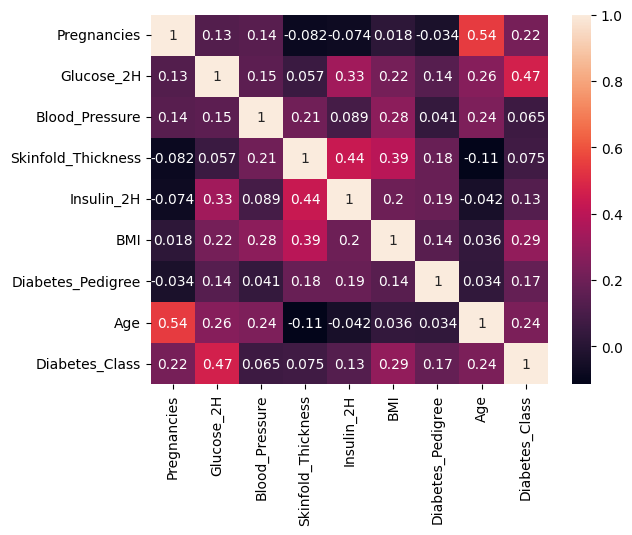

In [51]:
# 6. Tính mối tương quan Pearson cho từng cặp thuộc tính và trực quan hóa kết quả
pearson = data.corr(method='pearson')

import seaborn as sns
sns.heatmap(pearson, annot=True)
plt.show()

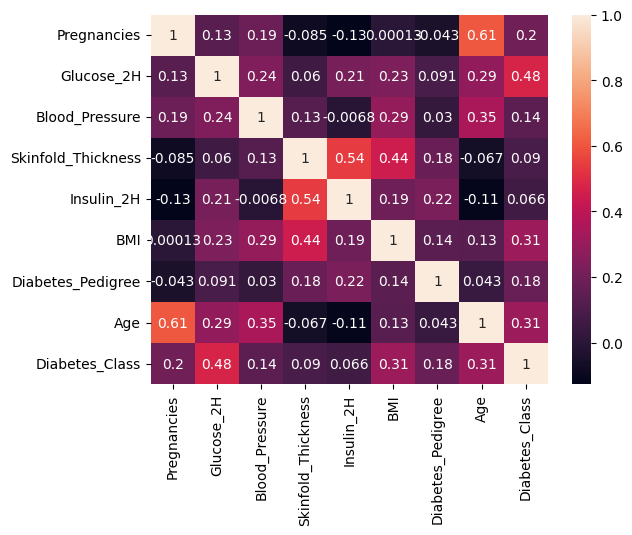

In [52]:

# 7. Tính mối tương quan Spearman cho từng cặp thuộc tính và trực quan hóa kết quả

spearman = data.corr(method='spearman')
sns.heatmap(spearman, annot=True)
plt.show()

In [53]:
# 8. Tính Độ lệch (skewness) cho mỗi thuộc tính
skew = data.skew()
skew

Pregnancies           0.901674
Glucose_2H            0.173754
Blood_Pressure       -1.843608
Skinfold_Thickness    0.109372
Insulin_2H            2.272251
BMI                  -0.428982
Diabetes_Pedigree     1.919911
Age                   1.129597
Diabetes_Class        0.635017
dtype: float64

In [54]:
data.head()

,Pregnancies,Glucose_2H,Blood_Pressure,Skinfold_Thickness,Insulin_2H,BMI,Diabetes_Pedigree,Age,Diabetes_Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:

# 9. Hãy sửa những dữ liệu có giá trị bằng 0 là dữ liệu thiếu (NaN) (trừ cột Diabetes_Class vì nó là cột output)
data.loc[:, 'Pregnancies':'Age'] = data.loc[:, 'Pregnancies':'Age'].replace(0, np.nan)
data

,Pregnancies,Glucose_2H,Blood_Pressure,Skinfold_Thickness,Insulin_2H,BMI,Diabetes_Pedigree,Age,Diabetes_Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [56]:
# 10. Đếm số lượng giá trị NaN trên mỗi thuộc tính
data.isnull().sum()


Pregnancies           111
Glucose_2H              5
Blood_Pressure         35
Skinfold_Thickness    227
Insulin_2H            374
BMI                    11
Diabetes_Pedigree       0
Age                     0
Diabetes_Class          0
dtype: int64

In [57]:
# 11. Thay thế giá trị còn thiếu bằng giá trị trung bình của mỗi thuộc tính và lưu vào 1 file
data.fillna(data.mean(), inplace=True)

In [83]:

# 12. Sử dụng mô hình hồi quy để dự đoán với file dữ liệu trên
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data.drop('Diabetes_Class', axis=1)
y = data['Diabetes_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Tính accuracy
print('Accuracy: ', regressor.score(X_test, y_test))

Accuracy:  0.2562020894605589


In [88]:
# 13. Làm lại ý 11 áp dụng công thức sau:
# X_std = (X - Xmin)/ (Xmax - X.min)
# X_scaled = X_std * (max - min) + min

Xmin = X_train.min()
Xmax = X_train.max()
X_std = (X_train - Xmin) / (Xmax - Xmin)
X_train_scaled = X_std * (Xmax - Xmin) + Xmin
X_test_std = (X_test - Xmin) / (Xmax - Xmin)
X_test_scaled = X_test_std * (Xmax - Xmin) + Xmin

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [90]:
# 14. Thực hiện lại ý 12 với dữ liệu ở ý 13
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Accuracy: ', regressor.score(X_test_scaled, y_test))

Accuracy:  0.256202089460559


In [91]:
# 15. So sánh kết quả đạt được ở ý 12 và 14
# Kết quả ở ý cả 2 kiểu khá tương tự nhau vì nếu sử dụng mô hình hồi quy cho bài toán phân loại thì kết quả sẽ không cao

# Bài 2:
2.1 Hãy khởi tạo điểm số là số nguyên của 100 học sinh học môn Toán (0-10) một cách ngẫu nhiên.       
2.2 Cho biết khoảng tin cậy với mức ý nghĩa 5%     
2.3 Hãy tính khoảng tin cậy của dữ liệu trên     

In [98]:
import numpy as np
import scipy.stats as stats

# 2.1
np.random.seed(0)
data = np.random.randint(0, 11, 100)

# 2.2
confidence = 0.95
n = len(data)
m = np.mean(data)
std_err = stats.sem(data) # (std_dev / np.sqrt(n))
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
h1 = std_err * stats.norm.ppf((1 + confidence) / 2) # vì n > 30 nên ta có thể sử dụng phân phối chuẩn
print('Khoảng tin cậy: ', m - h, m + h)
print('Khoảng tin cậy: ', m - h1, m + h1)

Khoảng tin cậy:  4.185588923170876 5.394411076829124
Khoảng tin cậy:  4.1929766041755485 5.3870233958244516


# Bài 3
Trả lời cho câu hỏi Học online hay học qua sách giáo khoa cái nào tốt hơn, chúng ta
tiến hành thực hiện chọn ngẫu nhiên 100 học sinh để học online và chọn ngẫu nhiên
100 học sinh để học qua sách giáo khoa. Cho 2 nhóm này học cùng một kiến thức
toán nhưng từ hai nguồn khác nhau (online, sách giáo khoa) sau đó cho làm bài kiểm tra toán trắc nghiệm để đánh giá 2 nhóm này. Hãy thực hiện các yêu cầu sau, cho biết công thức tính theo mean như sau:

$ SE=\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}} $

$UCL = \bar{x}_{1} - \bar{x}_{2} + t_{\alpha/2} \times SE$
$LCL = \bar{x}_{1} - \bar{x}_{2} - t_{\alpha/2} \times SE$

3.1 Khởi tạo mỗi nhóm 100 sinh viên.    
3.2 Cho nhóm học Online làm 30 câu kiểm tra với mỗi câu 1 điểm, sinh điểm ngẫu  
nhiên và in ra kết quả của nhóm này.    
3.3 Cho nhóm học qua sách giáo khoa làm 30 câu kiểm tra với mỗi câu 1 điểm, sinh    
điểm ngẫu nhiên in ra kết quả của nhóm này. 
3.4 Tính điểm trung bình đạt được của mỗi nhóm  
3.5 So sánh sự khác biệt về điểm số trung bình của 2 nhóm này           
3.6 Tính độ lệch chuẩn std của mỗi nhóm     
3.7 Tính standard error giữa 2 nhóm lấy mẫu ở trên      
3.8 Tính khoảng tin cậy với mức ý nghĩa 1%      

Hãy thực hiện kiểm định các giả thuyết sau:     
3.9 Học Online tốt hơn học qua sách giáo khoa       
3.10 Học Online không có gì khác học qua sách giáo khoa     
        

In [110]:
import numpy as np
from scipy import stats

# Khởi tạo mỗi nhóm 100 sinh viên
np.random.seed(0)
online_scores = np.random.randint(0, 11, 100)
textbook_scores = np.random.randint(0, 11, 100)

# Học Online làm bài kiểm tra và in ra kết quả
online_test_scores = np.random.randint(0, 2, 30).sum()
print("Điểm số của nhóm học Online:", online_test_scores)

# Học qua sách giáo khoa làm bài kiểm tra và in ra kết quả
textbook_test_scores = np.random.randint(0, 2, 30).sum()
print("Điểm số của nhóm học qua sách giáo khoa:", textbook_test_scores)

# Tính điểm trung bình đạt được của mỗi nhóm
mean_online = np.mean(online_scores)
mean_textbook = np.mean(textbook_scores)

# Tính độ lệch chuẩn std của mỗi nhóm
std_online = np.std(online_scores, ddof=1)
std_textbook = np.std(textbook_scores, ddof=1)

# Tính standard error giữa 2 nhóm lấy mẫu
n1 = len(online_scores)
n2 = len(textbook_scores)
SE = np.sqrt((std_online**2) / n1 + (std_textbook**2) / n2)

# Tính khoảng tin cậy với mức ý nghĩa 1%
alpha = 0.01
critical_value = stats.t.ppf(1 - alpha/2, df=n1+n2-2)
margin_of_error = critical_value * SE
lower_bound = (mean_online - mean_textbook) - margin_of_error
upper_bound = (mean_online - mean_textbook) + margin_of_error

print("\nĐiểm trung bình của nhóm học Online:", mean_online)
print("Điểm trung bình của nhóm học qua sách giáo khoa:", mean_textbook)
print("\nĐộ lệch chuẩn của nhóm học Online:", std_online)
print("Độ lệch chuẩn của nhóm học qua sách giáo khoa:", std_textbook)
print("\nStandard error giữa 2 nhóm lấy mẫu:", SE)
print("\nKhoảng tin cậy với mức ý nghĩa 1%:", (lower_bound, upper_bound))

# Kiểm định giả thuyết
t_statistic, p_value = stats.ttest_ind(online_scores, textbook_scores)
print("\nKết quả kiểm định giả thuyết:")
print("Giả thuyết H0: Học Online không có gì khác học qua sách giáo khoa")
print("Giả thuyết H1: Học Online tốt hơn học qua sách giáo khoa")
print("Giá trị p-value:", p_value)
if p_value < alpha:
    print("Kết luận: Bác bỏ giả thuyết H0, tức là học Online tốt hơn học qua sách giáo khoa")
else:
    print("Kết luận: Chưa có đủ bằng chứng để bác bỏ giả thuyết H0")




Điểm số của nhóm học Online: 16
Điểm số của nhóm học qua sách giáo khoa: 20

Điểm trung bình của nhóm học Online: 4.79
Điểm trung bình của nhóm học qua sách giáo khoa: 4.78

Độ lệch chuẩn của nhóm học Online: 3.0460937064848923
Độ lệch chuẩn của nhóm học qua sách giáo khoa: 3.2522874622907705

Standard error giữa 2 nhóm lấy mẫu: 0.44560139818071276

Khoảng tin cậy với mức ý nghĩa 1%: (-1.148959007570573, 1.1689590075705725)

Kết quả kiểm định giả thuyết:
Giả thuyết H0: Học Online không có gì khác học qua sách giáo khoa
Giả thuyết H1: Học Online tốt hơn học qua sách giáo khoa
Giá trị p-value: 0.9821183112634917
Kết luận: Chưa có đủ bằng chứng để bác bỏ giả thuyết H0


# Bài 4:
Làm lại bài 3 nếu áp dụng theo tỷ lệ với công thức sau:

$SE = \sqrt{\frac{{\hat{p}_1 \times (1 - \hat{p}_1)}}{n_1} + \frac{{\hat{p}_2 \times (1 - \hat{p}_2)}}{n_2}}$   
$UCL = (\hat{p}_1 - \hat{p}_2) + Z \times SE$   
$LCL = (\hat{p}_1 - \hat{p}_2) - Z \times SE$   


In [111]:
import numpy as np
from scipy import stats

# Khởi tạo mỗi nhóm 100 sinh viên
np.random.seed(0)
online_scores = np.random.randint(0, 11, 100)
textbook_scores = np.random.randint(0, 11, 100)

# Học Online làm bài kiểm tra và in ra kết quả
online_test_scores = np.random.randint(0, 2, 30).sum()
print("Điểm số của nhóm học Online:", online_test_scores)

# Học qua sách giáo khoa làm bài kiểm tra và in ra kết quả
textbook_test_scores = np.random.randint(0, 2, 30).sum()
print("Điểm số của nhóm học qua sách giáo khoa:", textbook_test_scores)

# Tính tỷ lệ điểm trung bình đạt được của mỗi nhóm
p1 = online_test_scores / len(online_scores)
p2 = textbook_test_scores / len(textbook_scores)

# Tính standard error theo tỷ lệ
n1 = len(online_scores)
n2 = len(textbook_scores)
SE = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# Tính khoảng tin cậy với mức ý nghĩa 1%
alpha = 0.01
Z = stats.norm.ppf(1 - alpha/2)
mean_diff = p1 - p2
UCL = mean_diff + Z * SE
LCL = mean_diff - Z * SE

print("\nTỷ lệ điểm trung bình của nhóm học Online:", p1)
print("Tỷ lệ điểm trung bình của nhóm học qua sách giáo khoa:", p2)
print("\nStandard error theo tỷ lệ:", SE)
print("\nKhoảng tin cậy với mức ý nghĩa 1%:")
print("UCL:", UCL)
print("LCL:", LCL)

# Kiểm định giả thuyết
z_statistic = (p1 - p2) / SE
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))
print("\nKết quả kiểm định giả thuyết:")
print("Giả thuyết H0: Học Online không có gì khác học qua sách giáo khoa")
print("Giả thuyết H1: Học Online tốt hơn học qua sách giáo khoa")
print("Giá trị z-statistic:", z_statistic)
print("Giá trị p-value:", p_value)
if p_value < alpha:
    print("Kết luận: Bác bỏ giả thuyết H0, tức là học Online tốt hơn học qua sách giáo khoa")
else:
    print("Kết luận: Chưa có đủ bằng chứng để bác bỏ giả thuyết H0")


Điểm số của nhóm học Online: 16
Điểm số của nhóm học qua sách giáo khoa: 20

Tỷ lệ điểm trung bình của nhóm học Online: 0.16
Tỷ lệ điểm trung bình của nhóm học qua sách giáo khoa: 0.2

Standard error theo tỷ lệ: 0.05425863986500215

Khoảng tin cậy với mức ý nghĩa 1%:
UCL: 0.09976099453497908
LCL: -0.1797609945349791

Kết quả kiểm định giả thuyết:
Giả thuyết H0: Học Online không có gì khác học qua sách giáo khoa
Giả thuyết H1: Học Online tốt hơn học qua sách giáo khoa
Giá trị z-statistic: -0.7372097807744857
Giá trị p-value: 0.4609947864255779
Kết luận: Chưa có đủ bằng chứng để bác bỏ giả thuyết H0


# Bài 5:
A/B testing (hay còn được gọi là split testing) là một quy trình mà trong đó hai phiên
bản (A và B) sẽ được cùng so sánh trong một môi trường / tình huống được xác định
và qua đó đánh giá xem phiên bản nào hiệu quả hơn.

Quy trình khi chạy A/B testing:    
-> Thu thập mẫu (gather samples)          
-> Chia nhóm (assign buckets)    
-> Áp dụng thử nghiệm (apply treatments)    
-> Đo lường kết quả (measure outcomes)  
-> So sánh kết quả (make comparisons)   
Hãy thực hiện lại bài 3 nếu tổng số mẫu là 300 theo cách học theo sách giáo khoa
theo các tỷ lệ 1:3 và 1:2


In [104]:
import numpy as np

# Thu thập mẫu (gather samples)
total_samples = 300

# Chia nhóm (assign buckets)
textbook_group_1 = np.random.choice(100, size=int(total_samples * (1/3)), replace=False)
textbook_group_2 = np.random.choice(200, size=int(total_samples * (1/2)), replace=False)

# Áp dụng thử nghiệm (apply treatments)
textbook_scores_1 = np.random.randint(0, 11, len(textbook_group_1))
textbook_scores_2 = np.random.randint(0, 11, len(textbook_group_2))

# Đo lường kết quả (measure outcomes)
mean_textbook_1 = np.mean(textbook_scores_1)
mean_textbook_2 = np.mean(textbook_scores_2)

# So sánh kết quả (make comparisons)
print("Điểm trung bình của nhóm học qua sách giáo khoa (1:3):", mean_textbook_1)
print("Điểm trung bình của nhóm học qua sách giáo khoa (1:2):", mean_textbook_2)

Điểm trung bình của nhóm học qua sách giáo khoa (1:3): 4.66
Điểm trung bình của nhóm học qua sách giáo khoa (1:2): 4.473333333333334


# Bài 6:
Chi-square: còn gọi là goodness-of-fit test: dùng để test các thống kê có phân hoạch
theo chu kỳ hay nhóm theo công thức:    
6.1 Hãy giả lập dữ liệu Báo cáo lượt view trong tuần từ phía Facebook, trực quan
hóa dữ liệu này     
6.2 Hãy giả lập dữ liệu Báo cáo lượt view trong tuần từ phía Google, trực quan hóa
dữ liệu này.    
6.3 Sử dụng phân tích Chi-square để kiểm tra xem Báo cáo lượt view trong tuần từ
phía Facebook có khác Google không với mức ý nghĩa 2%?  

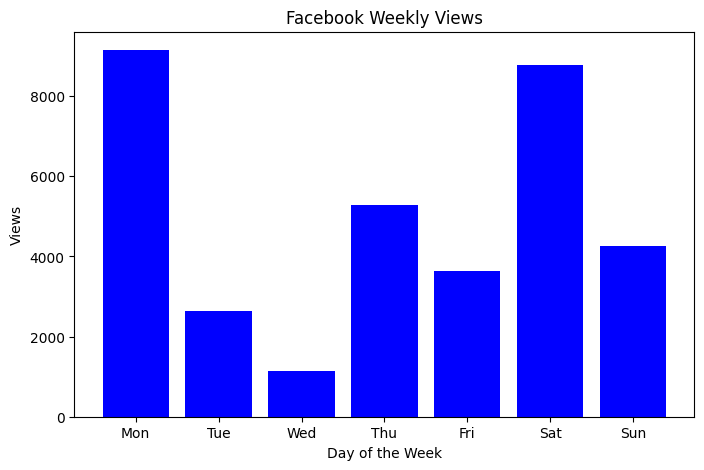

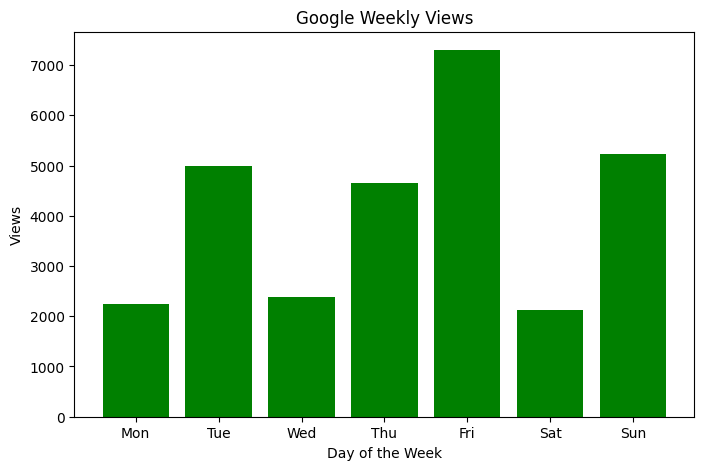

Giá trị p-value: 0.0
Có đủ bằng chứng để bác bỏ giả thuyết H0, tức là Facebook và Google có sự khác biệt trong lượt view trong tuần.


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Giả lập dữ liệu báo cáo lượt view trong tuần từ phía Facebook
facebook_views = np.random.randint(1000, 10000, 7)

# Trực quan hóa dữ liệu Facebook
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8, 5))
plt.bar(days, facebook_views, color='blue')
plt.title('Facebook Weekly Views')
plt.xlabel('Day of the Week')
plt.ylabel('Views')
plt.show()

# Giả lập dữ liệu báo cáo lượt view trong tuần từ phía Google
google_views = np.random.randint(800, 9000, 7)

# Trực quan hóa dữ liệu Google
plt.figure(figsize=(8, 5))
plt.bar(days, google_views, color='green')
plt.title('Google Weekly Views')
plt.xlabel('Day of the Week')
plt.ylabel('Views')
plt.show()

# Sử dụng phân tích Chi-square để kiểm tra sự khác biệt giữa Facebook và Google
chi2, p_value, _, _ = chi2_contingency([facebook_views, google_views])

# In kết quả kiểm định
alpha = 0.02
print("Giá trị p-value:", p_value)
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0, tức là Facebook và Google có sự khác biệt trong lượt view trong tuần.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0, tức là không có sự khác biệt đáng kể giữa Facebook và Google trong lượt view trong tuần.")


# Bài 7

In [107]:
import numpy as np
from scipy import stats

# 7.1. Xây dựng dữ liệu đánh giá phim
np.random.seed(0)
ratings = np.random.randint(1, 6, size=(10, 20))  # 10 bộ phim, mỗi bộ được đánh giá bởi 20 người

# 7.2. Tính SST (Total sum of squares)
mean_all = np.mean(ratings)  # Mean của tất cả các đánh giá
SST = np.sum((ratings - mean_all)**2)  # Tính SST

# 7.3. Tính SSW (Sum of squares within)
SSW = np.sum((ratings - np.mean(ratings, axis=1, keepdims=True))**2)  # Tính SSW

# 7.4. Tính SSB (Sum of squares between)
SSB = SST - SSW  # Tính SSB

# 7.5. Tính f-statistic
df_between = ratings.shape[0] - 1  # Độ tự do giữa
df_within = ratings.size - ratings.shape[0]  # Độ tự do trong
f_statistic = (SSB / df_between) / (SSW / df_within)  # Tính f-statistic

# 7.6. Kiểm định giả thuyết
alpha = 0.05
p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)
print("f-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0, tức là đánh giá các bộ phim không giống nhau.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0, tức là đánh giá các bộ phim giống nhau.")

f-statistic: 1.9998206921283828
p-value: 0.04131577661243713
Có đủ bằng chứng để bác bỏ giả thuyết H0, tức là đánh giá các bộ phim không giống nhau.
